# Árboles de Decisión

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Configurar estilo de gráficos
%matplotlib inline
sns.set(style='whitegrid')

Vamos a trabajar con un conjunto que ya todos se saben

In [8]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

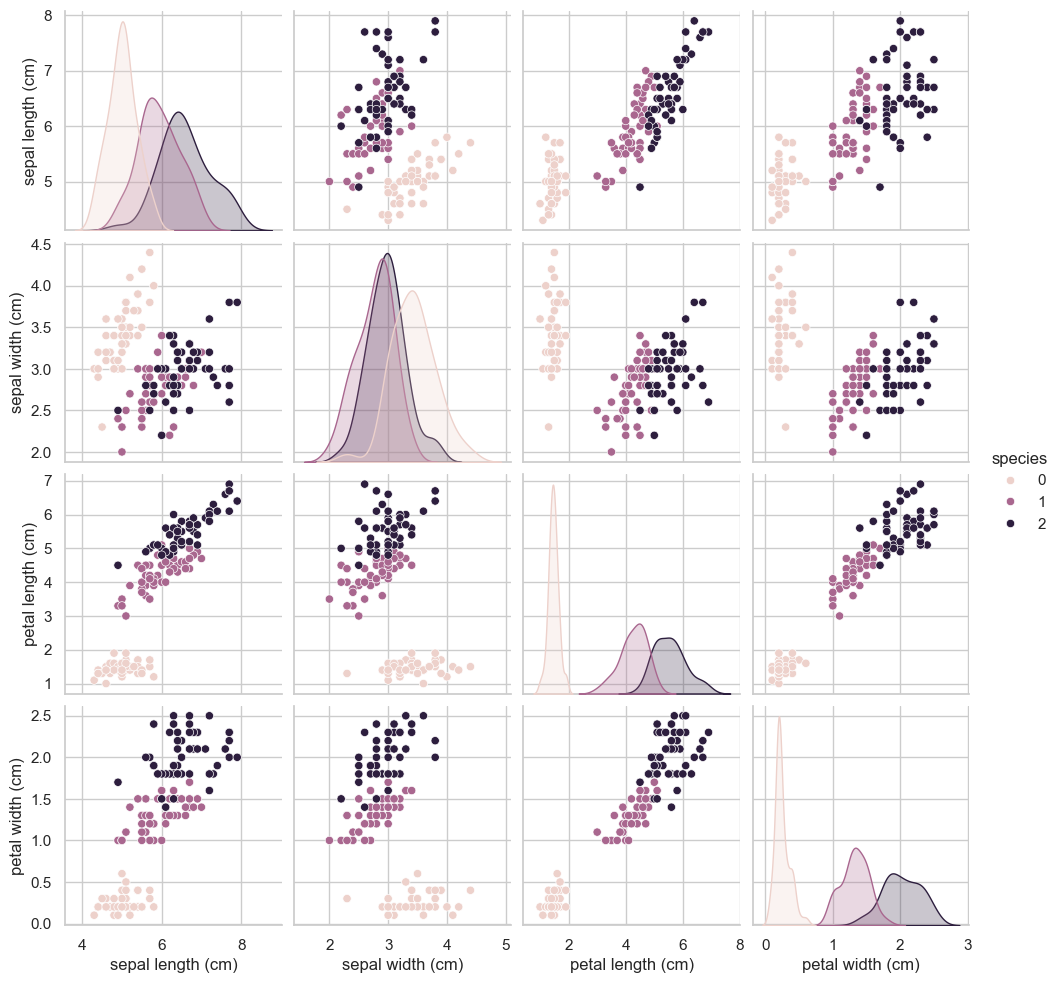

In [12]:
# Gráfico de pares
sns.pairplot(df, hue='species', vars=feature_names)
plt.show()

Observamos que las especies de Iris pueden separarse en función de las características. Esto sugiere que un árbol de decisión puede ser adecuado para clasificar las especies

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y)

In [19]:
# Crear una instancia del clasificador de árbol de decisión
clf = DecisionTreeClassifier(
    criterion='entropy',  # O 'gini'
    max_depth=None,       # Profundidad máxima del árbol
    random_state=22
)

In [21]:
# Entrenar el modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=22)

Veamos como se generó el árbol

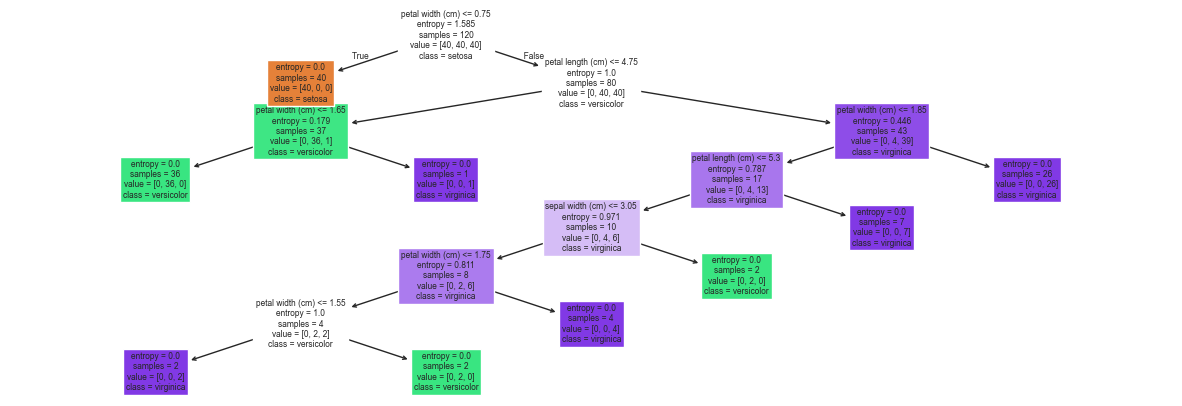

In [47]:
# Visualizar el árbol
plt.figure(figsize=(15,5))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True
)
plt.show()


In [55]:
# Realizar predicciones
y_pred = clf.predict(X_test)

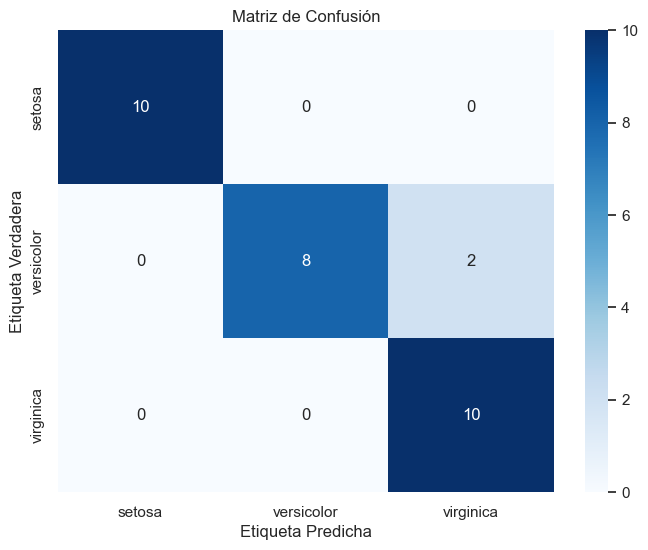

In [67]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualizar la matriz de confusión utilizando un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


In [63]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=class_names))


Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [65]:
# Importancia de las características
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


             Feature  Importance
3   petal width (cm)    0.678963
2  petal length (cm)    0.304111
1   sepal width (cm)    0.016926
0  sepal length (cm)    0.000000
